# Atelier 2 : Introduction au Machine Learning pour la regression


### Présentation du problème et du jeux de données

### Jeux de données
Cet ensemble de données contient des informations collectées par le US Census Service concernant le logement dans la région de Boston. Il a été obtenu à partir des archives StatLib (http://lib.stat.cmu.edu/datasets/boston) et a été largement utilisé par la littérature pour comparer les algorithmes. L'ensemble de données est de petite taille avec seulement 506 cas.

La variable cible ici 'medv' représente le prix, dans lequel la valeur médiane d'une maison doit être prédite.

Variables
    Il y a 14 attributs dans chaque cas de l'ensemble de données. 

- CRIM - taux de criminalité par habitant par ville
- ZN - proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pi.ca.
- INDUS - proportion d'acres commerciales non commerciales par ville.
- CHAS - Variable fictive Charles River (1 si le tronçon délimite la rivière; 0 sinon)
- NOX - concentration en oxydes nitriques (parties pour 10 millions)
- RM - nombre moyen de pièces par logement
- AGE - proportion de logements occupés par le propriétaire construits avant 1940
- DIS - distances pondérées vers cinq centres d'emploi de Boston
- RAD - indice d'accessibilité aux autoroutes radiales
- TAXE - taux d'impôt foncier de pleine valeur par 10,000 dollars.
- PTRATIO - ratio élèves / enseignant par ville
- B - 1000 (Bk - 0,63)^2 où Bk est la proportion de noirs par ville
- LSTAT -% de statut inférieur de la population
- MEDV - Valeur médiane des logements occupés par le propriétaire en milliers de dollars.
    
**_Remarque :_** Le jeu de données comporte 506 enregistrements.

Note 1 : Un pieds² fait environ 0,092 m²

Note 2 : Le fichier de données est sous forme csv, vous le trouverez en : _/datasets/Boston.csv_



## Régression linéaire multivariée

Dans ce notebook, nous allons voir toutes les étapes permenntant de résoudre un problème d'apprentissage automatique.
Les problèmes d'apprentissage automatique sont généralement divisés en deux groupes. 


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">




<center>
  <mi>f</mi>
  <mo>:</mo>
  <mi>x</mi>
  <mo stretchy="false">&#x2192;<!-- → --></mo>
  <mi>y</mi>
</math></center>


 -  x représente l'entrée
 -  y représente la valeur de <mi>f(x)</mi>.


1. **Classification** - Si y est une variable discrète ou catégorique.
Les prédictions de la classification peuvent être évaluées à l'aide de la précision, contrairement aux prévisions de la régression.

2. **Régression** - Si y est un nombre réel ou continu.


Nous pouvons facilement comprendre que notre problème est un problème de régression, car nous voulons prédire le prix, qui est un nombre réel.

Remarque: La variable cible est généralement prédite non seulement avec une seule variable prédictive mais avec plusieurs. Dans ce cas, on parle de  Multivariate Regression (régression linéaire multivariée). Dans ce qui va suivre, on va implémenter les méthodes les plus connues en utilisant les libraires de Machine learning de Python.

### Multivariate Regression

Quand une variable cible est le fruit de la corrélation de plusieurs variables prédictives, on parle de Multivariate Regression pour faire des prédictions. Prenons, par exemple, la prédiction du prix d’une voiture. Le prix est la variable cible, les variables prédictives peuvent être : nombre de kilomètres au compteur, le nombre de cylindres, nombre de portes…etc. Toutes ces variables prédictives seront utilisées dans notre modèle de régression linéaire multivariée pour trouver une fonction prédictive.

Dans le cas de régression linéaire multivariée, la fonction prédictive s’écrira sous la forme :





A noter que :

        ε : est une constante
        α, β, γ…. : représente les coefficients de notre fonction prédictive F(X)
        X : est un vecteur/tableau de variables prédictives. Pour l’exemple de prédiction du prix de la maison, la taille du vecteur X sera égale à 2 (superficie en pied2 et le nombre de chambres)
          xi : représente la ième variable prédictive.

Maintenant qu’on sait à quoi ressemblera notre fonction prédictive ainsi que nos données, essayons d’appliquer ce concept dans un cas concret en le codant en Python.

### Chargement des données

On commence par charger les données contenues dans le fichier csv. Python propose via sa librairie Pandas des classes et fonctions pour lire divers formats de fichiers notamment les fichiers Excel.

In [1]:
import pandas as pd
df = pd.read_csv("datasets/Boston.csv")
df=df.drop(columns=['Unnamed: 0'], axis =1 )


In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#df.medv.unique()

In [4]:
#on vérifie s'il n'y pas des valeurs nulles
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
#etude de la correlation
import seaborn as sns 
%matplotlib inline

matrice_corr = df.corr().round(1)
matrice_corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
zn,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
indus,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
chas,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
nox,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
rm,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
age,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
dis,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
rad,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
tax,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


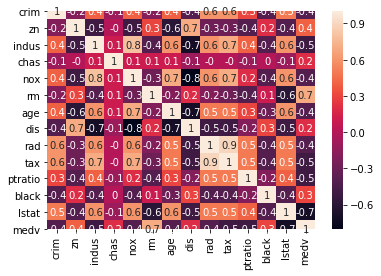

In [6]:
sns.heatmap(data=matrice_corr, annot=True)

Le prix a une forte corrélation avec LSTAT et RM. Cependant il ne faut pas négliger les autres attributs comme CRIM,ZN,INDUS… car leur corrélation sont pas proches de 0. 
Il faut savoir que lorsqu’on fait une regression linéaire on pose certaines hypothèses notamment la Non colinéarité des variables explicatives (une variable explicative ne doit pas pouvoir s’écrire comme combinaison linéaire des autres).

TAX et RAD ont une corrélation de 0.9; NOX et  DIS et AGE ont une corrélation de 0.7 ; DIS et INDUS ont une corrélation de 0.7.
Après une analyse minutieuse nous choisissons : LSAT, RM,TAX,PTRATIO

On utilise pour le modèle les variables choisies ci-dessus ensuite on divise notre jeu de données en 2 parties (80%, pour l’apprentissage et les 20% restant pour le test.

In [7]:
#on utilise seulement 4 variables explicatives
X = df[['lstat','rm','tax','ptratio']]
Y= df[['medv']]

In [8]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.2, 
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404, 1)
(102, 1)


In [9]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.204781068349566
le score R2 est 0.6881698566624727


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5.225485046087048
le score R2 est 0.6276519117091859


### Regression Ridge

In [11]:
#on utilise toutes les variables explicatives
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
Y= df[['medv']]

In [12]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.2, 
                                                    random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [13]:
from sklearn.linear_model import Ridge
clf = Ridge()
clf.fit(X_train, Y_train)
train_score = clf.score(X_train, Y_train)
print('train score = ',train_score )

train score =  0.7364918561980667


In [14]:
#Prédiction
pred = clf.predict(X_test)
mse = mean_squared_error(pred  , Y_test)
rmse = np.sqrt(mean_squared_error(pred,Y_test))
#print(' MSE = ',mse )
print(' RMSE = ',rmse )
r2 = r2_score(Y_test, pred)
print(' R2 = ',r2 )

 RMSE =  4.647501515397158
 R2 =  0.7241256474733334


### Regression LASSO

In [15]:
from sklearn.linear_model import Lasso
clf = Lasso()
clf.fit(X_train, Y_train)
train_score = clf.score(X_train, Y_train)
print('train score = ',train_score )

train score =  0.6840405260844409


In [16]:
#Prédiction
pred = clf.predict(X_test)
mse = mean_squared_error(pred  , Y_test)
rmse = np.sqrt(mean_squared_error(pred,Y_test))
#print(' MSE = ',mse )
print(' RMSE = ',rmse )
r2 = r2_score(Y_test, pred)
print(' R2 = ',r2 )

 RMSE =  5.418101665236402
 R2 =  0.6250558806119063


### Elastic Net

In [17]:
from sklearn.linear_model import ElasticNet
clf = ElasticNet()
clf.fit(X_train, Y_train)
train_score = clf.score(X_train, Y_train)
print('train score = ',train_score )

train score =  0.6934830925350169


In [18]:
#Prédiction
pred = clf.predict(X_test)
mse = mean_squared_error(pred  , Y_test)
rmse = np.sqrt(mean_squared_error(pred,Y_test))
#print(' MSE = ',mse )
print(' RMSE = ',rmse )
r2 = r2_score(Y_test, pred)
print(' R2 = ',r2 )

 RMSE =  5.332006672285767
 R2 =  0.636877119194873


### Méthode de Random Forest
Pour une documentation complète : 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor




In [19]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=None, n_estimators=100)
clf.fit(X_train, Y_train)# .values.ravel())

train_score = clf.score(X_train, Y_train)
print('train score = ',train_score )


/apps/python/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


train score =  0.9834769814302909


In [20]:
ypred = clf.predict(X_test)
mse = mean_squared_error(ypred  , Y_test)
rmse = np.sqrt(mean_squared_error(ypred,Y_test))
print(' Random Forest RMSE = ',rmse )
r2 = r2_score(Y_test, ypred)
print(' Random Forest R2 = ',r2 )

 Random Forest RMSE =  3.2630537994399065
 Random Forest R2 =  0.8640056970712908


### Pour aller plus loin :

### Normalisation des données et feature Scaling

Vous l’avez peut être remarqué, notre exemple comporte des variables prédictives avec des ordres de grandeurs très différents. En effet, le nombre de chambre d’une maison est généralement compris entre 1 et 10 alors que la superficie se compte en quelques milliers de pieds2.

Pour appliquer l’algorithme Multivariate Regression, il est nécessaire que les variables prédictives faisant partie du modèle prédictif soient du même ordre de grandeur. Généralement, il faut que la valeur de chaque variable prédictive soient compris (approximativement) entre -1 et 1. Si certaines valeurs dépassent un peu (par exemple -2 , 1.5…) ce n’est pas très grave.

Pour ramener nos variables prédictives au même ordre de grandeur, nous appliquerons un procédé qui s’appelle : _features scaling_

La librairie _Scikit learn_ de Python propose plusieurs classes et méthodes pour faire de la préparation de données (_Data pre-processing_) pour les algorithmes de Machine Learning. Le package sklearn.preprocessing propose la classe _StandardScaler_ qui permettra de faire du _features scaling_ sur toutes nos variables prédictives.

(voir tutoriel : https://www.datacorner.fr/feature-scaling/ )

In [21]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
#X_scaled = scale.fit_transform(X[['x1','X2']])

In [22]:
#from sklearn.model_selection import train_test_split
##decouper le data set en 30% pour test et 70% pour train
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

## Challenge : Prédiction de rendements de Maïs en France
(Data Set du CROP DATA CHALLENGE 2018) organisé par l'institut CLAND et l'université de Paris-Saclay.

#### Objectif
Le rendement agricole annuel d’une culture représente la quantité de produits récoltée par unité de surface une année donnée. Dans le cas du maïs, le rendement correspond à la quantité récoltée de grains, souvent exprimée en tonnes par hectare. Le rendement dépend des caractéristiques de la région où le maïs est cultivé et des conditions climatiques de l’année dans cette région (températures, rayonnements, précipitations etc.). La valeur du rendement est susceptible de varier fortement entre régions et entre années. Par exemple, le rendement pourra être anormalement faible une année présentant un déficit hydrique important à un stade clé du développement de la culture ou, au contraire, très élevé une année présentant des conditions climatiques optimales tout au long de la saison.
Il est important de prédire précisément le rendement avant la récolte. Celle-ci a généralement lieu à l’automne pour le maïs. 

L’objectif de ce challenge est de développer des outils permettant de prédire aussi précisément que possible les rendements du maïs en France.

#### Données

Le jeux de données contient : 

(i) les anomalies rendements annuels de maïs en tonnes par ha pour différents départements français et pour 57 années tirées au hasard.

(ii) les valeurs correspondantes de variables climatiques pour les mêmes départements et les mêmes années qui pourront être utilisées pour prédire les rendements. Une variable liée au pourcentage de surface agricole irriguée dans chaque département qui pourra également être prise en compte pour prédire le rendement. 

Dans ce fichier, les anomalies de rendement correspondent aux écarts entre les rendements observés et les tendances temporelles ajustées département par département. Une anomalie positive représente un gain de rendement par rapport au rendement attendu, et une anomalie négative correspond à une perte de rendement.

#### Liste des variables
- yield_anomaly : variable à prédire représentant l’anomalie de rendement de maïs (une valeur positive indique un rendement plus élevé qu’attendu, une valeur négative indique une valeur perte de rendement par rapport à la valeur attendue), exprimée en tonne par ha.
- year_harvest : année (anonyme) de récolte (1 à 57)
- NUMD : numéro (anonyme) indiquant le département (de 1 à 94).
- La variable yield_anomaly doit être prédite uniquement à l’aide des variables suivantes (ou d’une partie de ces variables) :
- ETP_1... ETP_9 : Evapotranspiration potentielle moyenne mensuelle par année et par département (1= janvier, 9=septembre)
- PR_1... PR_9 : Précipitation cumulée mensuelle par année et par département (1= janvier, 9=septembre)
- RV_1... RV_9 : Rayonnement moyen mensuel par année et par département (1= janvier, 9=septembre)
- SeqPR1...SeqPR9 : Nombre de jours de pluie mensuel par année et par département (1= janvier, 9=septembre)
- Tn_1...Tn_9 : Température minimale journalière moyenne mensuelle par année et par département (1= janvier, 9=septembre)
- Tx_1...Tx_9 : Température maximale journalière moyenne mensuelle par année et par département (1= janvier, 9=septembre)
- IRR : variable comprise entre 1 et 5 liée à la fraction de surface agricole irriguée dans chaque département. La valeur 1 indique une fraction faible, la valeur 5 indique une fraction élevée de surface irriguée. Ces valeurs sont indicatives car établies sur la base d’information collectée pendant une seule année.

Important : Le maïs est généralement semé au printemps et est récolté à l’automne. Les valeurs des variables climatiques pour les mois 1 à 9 correspondent aux valeurs obtenues l’année de récolte. Elles sont disponibles avant la récolte et peuvent donc être utilisées directement pour prédire le rendement. Les valeurs des variables climatiques des mois 10 à 12 sont absentes des fichiers.

In [23]:
# importation des lib 

import pandas as pd
import numpy as np


Avec la fonction *read_csv* de Pandas: on peut mettre dans notre dataframe le contenu du fichier csv, en indiquant comme paramètre (1: le chemin du fichier csv, 2: les séparateurs entre les valeurs -dans notre cas des virgules-, 3: un paramètre facultatif pour spécifier le type d'encodage de notre fichier -exemple encoding ="UTF8"-).

In [24]:


df = pd.read_csv("datasets/TrainingDataSet_Maize.txt"
                 ,sep="\t")

df.head()

,year_harvest,yield_anomaly,NUMD,IRR,ETP_1,ETP_2,ETP_3,ETP_4,ETP_5,ETP_6,...,Tn_9,Tx_1,Tx_2,Tx_3,Tx_4,Tx_5,Tx_6,Tx_7,Tx_8,Tx_9
1,1,-0.348898,1,3,0.480319,0.650041,0.952222,1.91736,2.72082,3.49425,...,12.60090,4.45812,6.99729,12.34220,14.0660,18.5257,22.3311,26.4056,23.4798,22.0578
2,2,0.248004,1,3,0.291583,0.577265,0.981122,2.12405,3.09640,3.57063,...,9.08623,2.90072,8.17561,11.02550,13.2580,20.4857,22.5911,20.8484,21.1559,16.7304
4,4,-0.680846,1,3,0.376123,0.402265,0.989877,1.85831,2.02216,3.92564,...,10.29380,5.53765,3.68101,6.58445,12.8914,15.7882,20.8746,23.6048,25.8095,19.7318
7,7,0.131701,1,3,0.295047,0.529465,1.089250,1.29556,2.28783,2.98314,...,9.24150,4.00556,1.58452,9.44506,11.3260,16.5768,21.1366,20.7600,21.4713,17.0162
8,8,0.494094,1,3,0.338398,0.620546,1.086790,1.57893,2.71805,3.25668,...,11.12920,2.43056,9.83980,8.61226,14.6293,17.5938,21.8847,20.5476,21.1821,21.4476


In [25]:
df.shape

(3394, 58)

# Pistes de solution en bas !👇👇


# Solution 

In [38]:
df.describe()

,year_harvest,yield_anomaly,NUMD,IRR,ETP_1,ETP_2,ETP_3,ETP_4,ETP_5,ETP_6,...,Tn_9,Tx_1,Tx_2,Tx_3,Tx_4,Tx_5,Tx_6,Tx_7,Tx_8,Tx_9
count,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,...,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,32.690925,0.064903,47.330289,2.537714,0.467530,0.741396,1.384301,2.143409,2.835691,3.608927,...,10.891241,6.148712,7.098265,10.642534,13.496596,17.205674,20.636766,23.305263,23.381701,19.978604
std,16.468054,1.005041,27.193041,1.257301,0.175617,0.232272,0.365664,0.468339,0.587240,0.614860,...,1.882389,2.541842,3.134868,2.748352,2.519860,2.638683,2.527143,2.916781,2.773056,2.475891
min,1.000000,-7.863716,1.000000,1.000000,0.106450,0.216807,0.426533,0.730761,1.027820,1.922080,...,3.075520,-3.349200,-3.863960,-1.666640,3.033760,5.376440,11.249300,13.541100,12.800900,9.784150
25%,22.000000,-0.466901,24.000000,1.000000,0.345405,0.577332,1.125317,1.826580,2.435713,3.166957,...,9.650578,4.510695,4.957805,9.008648,12.067800,15.522900,19.006475,21.200000,21.459175,18.243375
50%,35.000000,0.110692,48.000000,2.000000,0.444171,0.712583,1.360140,2.115865,2.847940,3.595435,...,10.839550,6.336345,7.340615,10.804100,13.554550,17.318850,20.596900,23.269650,23.254800,19.955750
75%,47.000000,0.711710,71.000000,3.000000,0.558306,0.878224,1.606218,2.428028,3.230735,4.025825,...,12.064600,8.063612,9.355243,12.443250,15.125025,19.058825,22.196400,25.391650,25.140350,21.737025
max,57.000000,4.911717,94.000000,5.000000,1.514980,2.037880,2.954790,3.943750,4.796450,5.759450,...,16.440200,12.447900,15.651200,18.594200,21.787300,24.455500,30.365800,32.513100,33.679200,26.995400


## 2. Visualisation des données
Dans ce qui va suivre, je voudrais montrer la valeure de prediction de perte de maïs et son changement au fil des années.

Text(0.5, 1.0, 'anomalies de rendement par année')

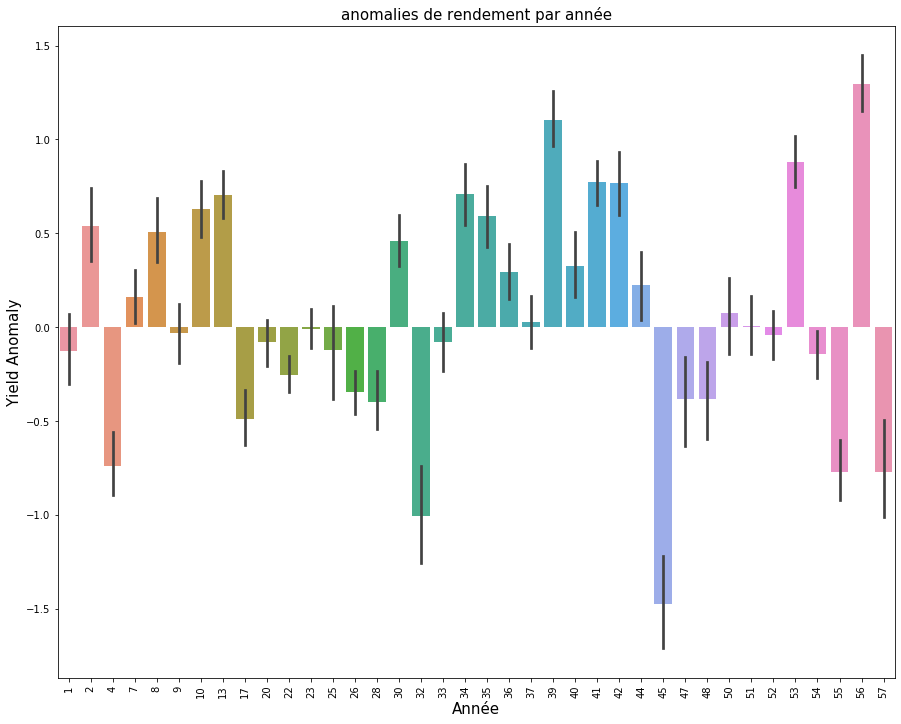

In [39]:
## visualisation des données

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df['year_harvest'], y=df['yield_anomaly'])
plt.xlabel('Année', fontsize=15)
plt.ylabel('Yield Anomaly', fontsize=15)
plt.title('anomalies de rendement par année', fontsize=15)

#### Le changement de l'indice de prediction de rendement de maïs selon les départements de France

Text(0.5, 1.0, 'anomalies de rendement par Département')

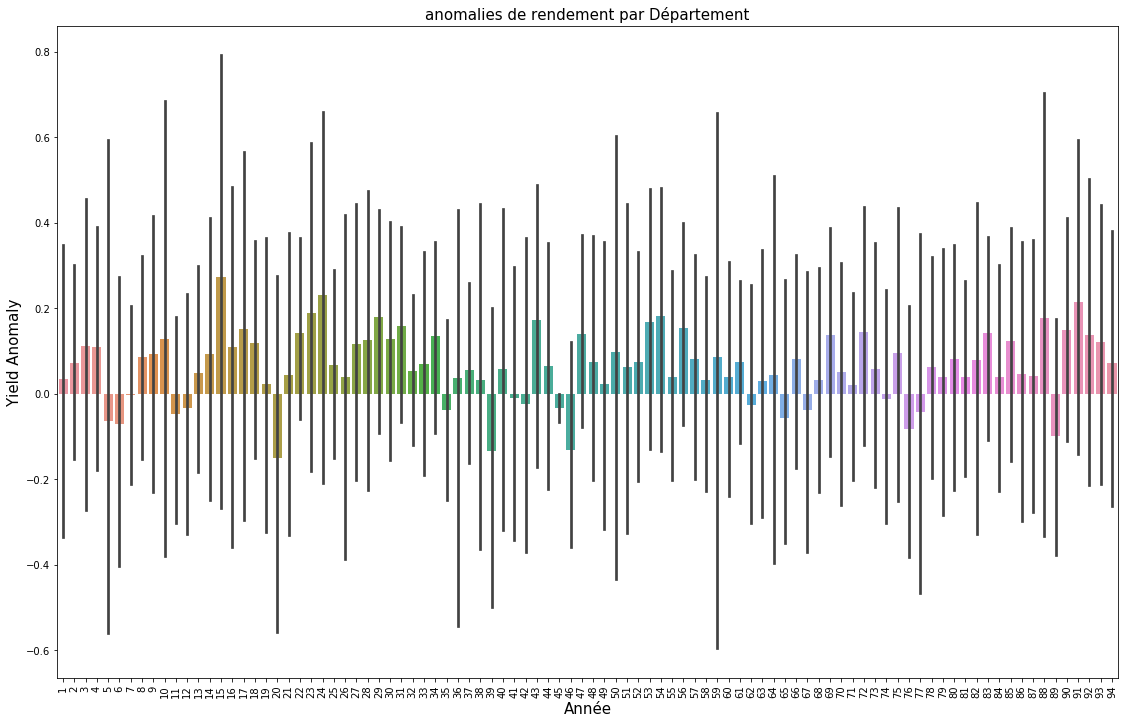

In [40]:
## visualisation des données

f, ax = plt.subplots(figsize=(19, 12))
plt.xticks(rotation='90')
sns.barplot(x=df['NUMD'], y=df['yield_anomaly'])
plt.xlabel('Année', fontsize=15)
plt.ylabel('Yield Anomaly', fontsize=15)
plt.title('anomalies de rendement par Département', fontsize=15)

#### Représenter la distribution de la valeure de perte de rendement avec la lib seaborn.

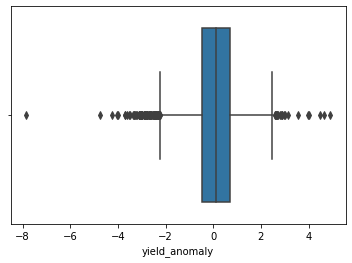

In [41]:
#import matplot
import seaborn as sns
# schématiser la distribution de la valeur
sns.boxplot(df['yield_anomaly'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3260379c88>,
      dtype=object)

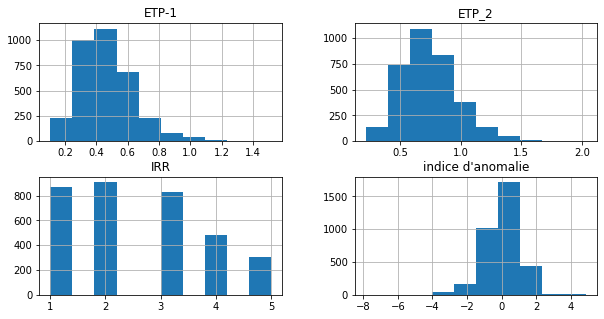

In [42]:
#schamatiser les plages de valeurs de quelques attributs
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
count = pd.DataFrame({"indice d'anomalie":df['yield_anomaly'], "IRR":(df['IRR']),
                      "ETP-1":df['ETP_1'], "ETP_2":(df['ETP_2'])
                      })
count.hist()

In [43]:
dff = df.drop(columns=['year_harvest'])

In [44]:
dff

,yield_anomaly,NUMD,IRR,ETP_1,ETP_2,ETP_3,ETP_4,ETP_5,ETP_6,ETP_7,...,Tn_9,Tx_1,Tx_2,Tx_3,Tx_4,Tx_5,Tx_6,Tx_7,Tx_8,Tx_9
1,-0.348898,1,3,0.480319,0.650041,0.952222,1.91736,2.72082,3.49425,4.28025,...,12.60090,4.45812,6.99729,12.34220,14.0660,18.5257,22.3311,26.4056,23.4798,22.0578
2,0.248004,1,3,0.291583,0.577265,0.981122,2.12405,3.09640,3.57063,2.51640,...,9.08623,2.90072,8.17561,11.02550,13.2580,20.4857,22.5911,20.8484,21.1559,16.7304
4,-0.680846,1,3,0.376123,0.402265,0.989877,1.85831,2.02216,3.92564,3.66216,...,10.29380,5.53765,3.68101,6.58445,12.8914,15.7882,20.8746,23.6048,25.8095,19.7318
7,0.131701,1,3,0.295047,0.529465,1.089250,1.29556,2.28783,2.98314,2.81184,...,9.24150,4.00556,1.58452,9.44506,11.3260,16.5768,21.1366,20.7600,21.4713,17.0162
8,0.494094,1,3,0.338398,0.620546,1.086790,1.57893,2.71805,3.25668,3.18827,...,11.12920,2.43056,9.83980,8.61226,14.6293,17.5938,21.8847,20.5476,21.1821,21.4476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,1.352324,94,2,0.340910,0.560853,1.546830,2.63565,3.26765,3.40589,3.29890,...,11.82910,5.93261,8.32764,13.00200,18.9494,19.8724,21.0229,20.9396,22.2615,21.9129
5099,0.100955,94,2,0.419189,0.546106,1.688430,1.70960,2.82540,2.61661,3.26611,...,8.89857,8.17864,4.25094,14.35910,12.1798,18.5077,19.3965,21.9561,25.0568,19.7727
5100,0.583355,94,2,0.243030,0.565408,1.031320,1.98362,2.09999,2.70093,3.94186,...,11.09080,4.81301,4.75316,7.13951,13.3137,14.9107,19.7704,26.2697,23.3699,19.4212
5101,1.741977,94,2,0.329065,0.674199,1.479400,1.82256,2.27043,3.03368,2.71025,...,11.33200,8.09166,9.11196,12.94040,15.1217,16.2389,20.9585,23.2703,20.1971,21.6114


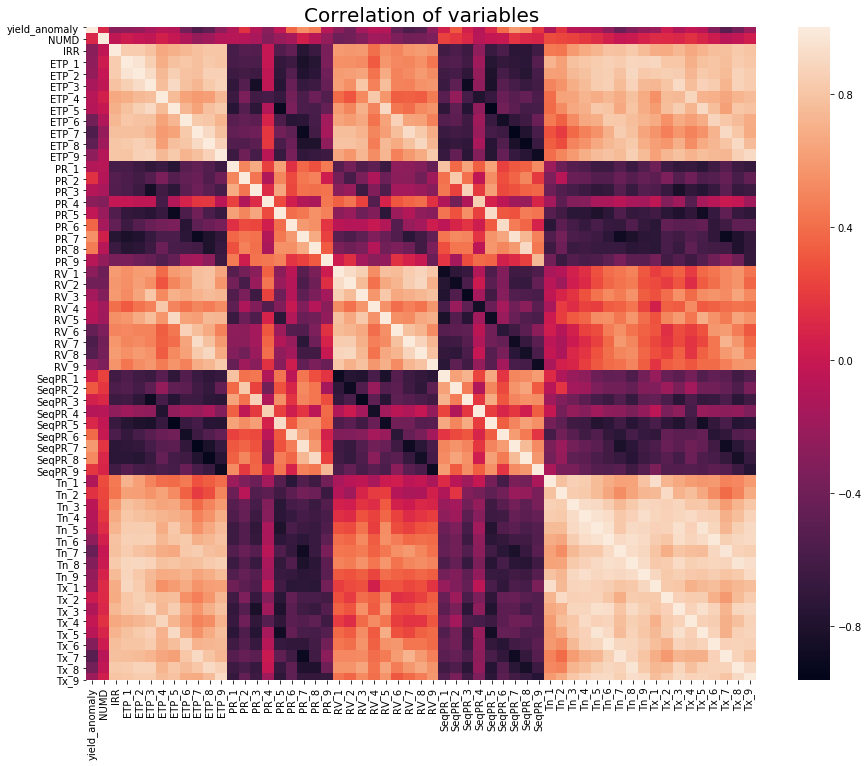

In [45]:
# matrice de corrélation

plt.figure(figsize=(15,12))
plt.title('Correlation of variables', fontsize=20)
sns.heatmap(dff.corr().astype(float).corr(),vmax=1.0)
plt.show()

## 3. Statistiques descriptives élémentaires

Lire les informations sur les données (Types d'attributs, valeurs manquantes...)
la lib Pandas permet de voir les informations sur le jeux de données
exemple: 
   - dataframe.info() retourne tout les attributs du dataset avec le type de donnée et le nombre de valeurs de chaque colonne ;
   - dataframe.columns permet de citer toutes les colonnes.

In [46]:
df.describe() #donner les infos de notre data frame

,year_harvest,yield_anomaly,NUMD,IRR,ETP_1,ETP_2,ETP_3,ETP_4,ETP_5,ETP_6,...,Tn_9,Tx_1,Tx_2,Tx_3,Tx_4,Tx_5,Tx_6,Tx_7,Tx_8,Tx_9
count,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,...,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,32.690925,0.064903,47.330289,2.537714,0.467530,0.741396,1.384301,2.143409,2.835691,3.608927,...,10.891241,6.148712,7.098265,10.642534,13.496596,17.205674,20.636766,23.305263,23.381701,19.978604
std,16.468054,1.005041,27.193041,1.257301,0.175617,0.232272,0.365664,0.468339,0.587240,0.614860,...,1.882389,2.541842,3.134868,2.748352,2.519860,2.638683,2.527143,2.916781,2.773056,2.475891
min,1.000000,-7.863716,1.000000,1.000000,0.106450,0.216807,0.426533,0.730761,1.027820,1.922080,...,3.075520,-3.349200,-3.863960,-1.666640,3.033760,5.376440,11.249300,13.541100,12.800900,9.784150
25%,22.000000,-0.466901,24.000000,1.000000,0.345405,0.577332,1.125317,1.826580,2.435713,3.166957,...,9.650578,4.510695,4.957805,9.008648,12.067800,15.522900,19.006475,21.200000,21.459175,18.243375
50%,35.000000,0.110692,48.000000,2.000000,0.444171,0.712583,1.360140,2.115865,2.847940,3.595435,...,10.839550,6.336345,7.340615,10.804100,13.554550,17.318850,20.596900,23.269650,23.254800,19.955750
75%,47.000000,0.711710,71.000000,3.000000,0.558306,0.878224,1.606218,2.428028,3.230735,4.025825,...,12.064600,8.063612,9.355243,12.443250,15.125025,19.058825,22.196400,25.391650,25.140350,21.737025
max,57.000000,4.911717,94.000000,5.000000,1.514980,2.037880,2.954790,3.943750,4.796450,5.759450,...,16.440200,12.447900,15.651200,18.594200,21.787300,24.455500,30.365800,32.513100,33.679200,26.995400


In [47]:
# description détaillées des colonnes

pd.set_option('precision', 2)
print(df.describe())

       year_harvest  yield_anomaly     NUMD      IRR    ETP_1    ETP_2  \
count       3394.00        3394.00  3394.00  3394.00  3394.00  3394.00   
mean          32.69           0.06    47.33     2.54     0.47     0.74   
std           16.47           1.01    27.19     1.26     0.18     0.23   
min            1.00          -7.86     1.00     1.00     0.11     0.22   
25%           22.00          -0.47    24.00     1.00     0.35     0.58   
50%           35.00           0.11    48.00     2.00     0.44     0.71   
75%           47.00           0.71    71.00     3.00     0.56     0.88   
max           57.00           4.91    94.00     5.00     1.51     2.04   

         ETP_3    ETP_4    ETP_5    ETP_6  ...     Tn_9     Tx_1     Tx_2  \
count  3394.00  3394.00  3394.00  3394.00  ...  3394.00  3394.00  3394.00   
mean      1.38     2.14     2.84     3.61  ...    10.89     6.15     7.10   
std       0.37     0.47     0.59     0.61  ...     1.88     2.54     3.13   
min       0.43     0.73  

## 4. préparation des données
Dans cette étape nous déterminons les attributs choisis pour l'entrainement et nous définissons la variable cible (variable à prédire).

In [48]:
df.columns # citer les colonnes

Index(['year_harvest', 'yield_anomaly', 'NUMD', 'IRR', 'ETP_1', 'ETP_2',
       'ETP_3', 'ETP_4', 'ETP_5', 'ETP_6', 'ETP_7', 'ETP_8', 'ETP_9', 'PR_1',
       'PR_2', 'PR_3', 'PR_4', 'PR_5', 'PR_6', 'PR_7', 'PR_8', 'PR_9', 'RV_1',
       'RV_2', 'RV_3', 'RV_4', 'RV_5', 'RV_6', 'RV_7', 'RV_8', 'RV_9',
       'SeqPR_1', 'SeqPR_2', 'SeqPR_3', 'SeqPR_4', 'SeqPR_5', 'SeqPR_6',
       'SeqPR_7', 'SeqPR_8', 'SeqPR_9', 'Tn_1', 'Tn_2', 'Tn_3', 'Tn_4', 'Tn_5',
       'Tn_6', 'Tn_7', 'Tn_8', 'Tn_9', 'Tx_1', 'Tx_2', 'Tx_3', 'Tx_4', 'Tx_5',
       'Tx_6', 'Tx_7', 'Tx_8', 'Tx_9'],
      dtype='object')

In [49]:
# définir les attraibuts qui nous intéréssent, ici j'ai éliminé les attributs qui contiennent des nulles
df_features = df[['year_harvest',  'NUMD', 'IRR', 'ETP_1', 'ETP_2',
       'ETP_3', 'ETP_4', 'ETP_5', 'ETP_6', 'ETP_7', 'ETP_8', 'ETP_9', 'PR_1',
       'PR_2', 'PR_3', 'PR_4', 'PR_5', 'PR_6', 'PR_7', 'PR_8', 'PR_9', 'RV_1',
       'RV_2', 'RV_3', 'RV_4', 'RV_5', 'RV_6', 'RV_7', 'RV_8', 'RV_9',
       'SeqPR_1', 'SeqPR_2', 'SeqPR_3', 'SeqPR_4', 'SeqPR_5', 'SeqPR_6',
       'SeqPR_7', 'SeqPR_8', 'SeqPR_9', 'Tn_1', 'Tn_2', 'Tn_3', 'Tn_4', 'Tn_5',
       'Tn_6', 'Tn_7', 'Tn_8', 'Tn_9', 'Tx_1', 'Tx_2', 'Tx_3', 'Tx_4', 'Tx_5',
       'Tx_6', 'Tx_7', 'Tx_8', 'Tx_9'
                 ]]

In [50]:
# définir la variable cible
df_labels = df[['yield_anomaly']]

#### Diviser le dataset en données d'entrainement et données de teste
Ceci est réalisable avec sklearn qui permet de prendre aléatoirement des données de teste à partir du benchmark et laisser le reste pour l'apprentissage.
La fonction train_test_split(param1,param2,param3,param4) prends 4 paramétres:
le premier dédié à l'ensemble d'entrainement, le deuxième à l'ensemble de teste, le troisième c'est le paramètre du % de l'ensemble de test (généralement entre 15 et 40%), 

le 4 ème paramétre (facultatif) pour spécifier quel type de fonction random utiliser:
si vous utilisez random_state = some_number, vous pouvez garantir que la sortie de Run 1 sera égale à la sortie de Run 2, c'est-à-dire que votre split sera toujours le même. Peu importe ce que le nombre réel random_state est 42, 0, 21, ... L'important est que chaque fois que vous utilisez 42, vous obtiendrez toujours la même sortie la première fois que vous faites la division. Ceci est utile si vous voulez des résultats reproductibles, par exemple dans la documentation, afin que tout le monde puisse toujours voir les mêmes nombres lors de l'exécution des exemples.

Cette fonction retourne 4 sorties: 
La 1ere est le sous-ensembles aléatoires d'entrainement 
La 2éme est le vecteur de leurs labels (leurs classes).
La 3ème est le sous-ensemble aléatoire pour le teste.
La 4ème est le vecteur de leurs labels (leurs classes).

In [51]:
from sklearn.model_selection import train_test_split
#decouper le data set en 30% pour test et 70% pour train
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=1)

.shape permet de savoir la dimension d'un ensemble. 

Par exemple ici l'ensemble d'entrainement est composé de 2715 lignes et 57 colonnes. 

In [52]:
print('x_train shape:', X_train.shape) # .shape permet de voir la
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (2715, 57)
x_test shape: (679, 57)
y_train shape: (2715, 1)
y_test shape: (679, 1)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso ,Ridge

from sklearn.metrics import mean_squared_error

In [59]:
model = Lasso()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print('train score = ',train_score )

#Prédiction
pred = model.predict(X_test)
mse = mean_squared_error(pred  , y_test)
rmse = np.sqrt(mean_squared_error(pred,y_test))
#print(' MSE = ',mse )
print(' RMSE = ',rmse )
r2 = r2_score(y_test, pred)
print(' R2 = ',r2 )

train score =  0.09978181008467256
 RMSE =  0.9154237857998224
 R2 =  0.10800711645231531


### Meilleur score 2018 :

train score =  0.9241846478777389

RMSE =  0.7182529987605482


### Challenge 1: « Crop Data Challenge 2018 - Prédiction des pertes de rendement du blé en France »
#### Objectif
Le rendement agricole annuel d’une culture représente la quantité de produits récoltée par unité de surface une année donnée. Dans le cas du blé d’hiver, le rendement correspond à la quantité récoltée de grains, souvent exprimée en tonnes par hectare. Le rendement dépend des caractéristiques de la région où le blé est cultivé et des conditions climatiques dans cette région (températures, rayonnements, précipitations etc.). 

La valeur du rendement est susceptible de varier fortement entre régions et entre années. Par exemple, le rendement pourra être anormalement faible une année présentant un déficit hydrique important à un stade clé du développement de la culture ou, au contraire, très élevé une année présentant des conditions climatiques optimales tout au long de la saison.
Il est important de prédire précisément le rendement avant la récolte. En France, celle-ci a généralement lieu en juillet pour le blé. 

L’objectif de ce challenge est de développer des outils permettant de classer aussi précisément que possible les valeurs de rendement du blé en France.

Données

- Un fichier de données (TrainingDataSet_Wheat) incluant :

(i) une variable binaire indiquant l’occurrence d’une perte sévère de rendement ou l’absence de perte sévère pour différents départements français et pour 39 années tirées au hasard.

(ii) les valeurs correspondantes de variables climatiques pour les mêmes départements et les mêmes années qui pourront être utilisées pour prédire les rendements.

#### Règles
Pour ce challenge vous pouvez développer une méthode de classification des pertes de rendement annuel du blé (ex : knn, arbres de decision, réseau de neurone). Pour choisir le meilleur modèle proposé, il faudrait que chaque participant réalise une évaluation d'accuracy de son modèle par validation croisée avec k=5.

#### Liste des variables
Class : variable égale à 1 en cas de perte sévère de rendement de blé et à zéro sinon. Il s’agit de la variable cible à prédire.

• year_harvest : année (anonyme) de récolte (1 à 58)

• NUMD : numéro (anonyme) indiquant le département (de 1 à 94).

• ETP_1... ETP_12 : Evapotranspiration potentielle moyenne mensuelle par année et par département (1= janvier, 12=décembre)

• PR_1... PR_12 : Précipitation cumulée mensuelle par année et par département (1= janvier, 12=décembre)

• RV_1... RV_12 : Rayonnement moyen mensuel par année et par département (1= janvier, 12=décembre)

• SeqPR1...SeqPR12 : Nombre de jours de pluie mensuel par année et par département (1= janvier, 12=décembre)

• Tn_1...Tn_12 : Température minimale journalière moyenne mensuelle par année et par département (1= janvier, 12=décembre)

• Tx_1...Tx_12 : Température maximale journalière moyenne mensuelle par année et par département (1= janvier, 12=décembre)

• Tn17.1_1 ... Tn17.1_12 : Nombre de jours où la température minimale journalière est inférieure à -17 degrés C pour chaque mois par année et par département (1= janvier, 12=décembre)

• Tx010_1 ... Tx010_12 : Nombre de jours où la température maximale journalière est comprise entre zéro et 10 degrés C pour chaque mois par année et par département (1= janvier, 12=décembre)

• Tx34_1... Tx34_12 : Nombre de jours où la température maximale journalière est supérieure à 34 degrés C pour chaque mois par année et par département (1= janvier, 12=décembre)

Important : Le blé d’hiver est semé à l’automne et est habituellement récolté en juillet. Les valeurs des variables climatiques pour les mois 9 à 12 correspondent aux valeurs obtenues l’année qui précède l’année de récolte. Les valeurs des variables climatiques pour les mois 1 à 6 correspondent aux valeurs obtenues l’année de récolte. Toutes ces valeurs sont disponibles avant juillet et peuvent donc être utilisées directement pour prédire le rendement avant la récolte. Les valeurs des variables climatiques des mois 7 et 8 sont absentes.



In [ ]:
import pandas as pd
# read the csv-formatted data file into a pandas dataframe
df=pd.read_csv('datasets/TrainingDataSet_Wheat.txt', delimiter="\t")
# get shape of data frame
print('Shape (n_rows,n_columns) of dataframe:',df.shape)
# print top 5 rows (default) of the data frame
df.head()